In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

# from apyori import apriori

# fr = pd.read_csv('../data/final_clean.csv')

fr = pd.read_csv('../data/final_clean_r2.csv')


## Prep Data into Basket Transactions

Three, or four, different "label" outcomes - 

* Company 

* Outcome (e.g. approved/denied)

* Applicant Race

In [2]:
mapper = {
    'applicant_race':{
        'American Indian/Alaska Native':0b0000000000000000001,
        'Asian':0b0000000000000000010,
        'Asian Indian':0b0000000000000000100,
        'Chinese':0b0000000000000001000,
        'Filipino':0b0000000000000010000,
        'Japanese':0b0000000000000100000,
        'Korean':0b0000000000001000000,
        'Vietnamese':0b0000000000010000000,
        'Other Asian':0b0000000000100000000,
        'Black/African American':0b0000000001000000000,
        'Native Hawaiian/Pacific Islander':0b0000000010000000000,
        'Native Hawaiian':0b0000000100000000000,
        'Guamanian/Chamorro':0b0000001000000000000,
        'Samoan':0b0000010000000000000,
        'Other Pacific Islander':0b0000100000000000000,
        'White':0b0001000000000000000,
        'Information not provided':0b0010000000000000000,
        'Not Applicable':0b0100000000000000000,
        'No Co-applicant':0b1000000000000000000
    },
    # 'co-applicant_race':{
    #     'American Indian/Alaska Native':0b0000000000000000001,
    #     'Asian':0b0000000000000000010,
    #     'Asian Indian':0b0000000000000000100,
    #     'Chinese':0b0000000000000001000,
    #     'Filipino':0b0000000000000010000,
    #     'Japanese':0b0000000000000100000,
    #     'Korean':0b0000000000001000000,
    #     'Vietnamese':0b0000000000010000000,
    #     'Other Asian':0b0000000000100000000,
    #     'Black/African American':0b0000000001000000000,
    #     'Native Hawaiian/Pacific Islander':0b0000000010000000000,
    #     'Native Hawaiian':0b0000000100000000000,
    #     'Guamanian/Chamorro':0b0000001000000000000,
    #     'Samoan':0b0000010000000000000,
    #     'Other Pacific Islander':0b0000100000000000000,
    #     'White':0b0001000000000000000,
    #     'Information not provided':0b0010000000000000000,
    #     'Not Applicable':0b0100000000000000000,
    #     'No Co-applicant':0b1000000000000000000
    # },
    'applicant_ethnicity':{
        'Hispanic/Latino':0b000000001,
        'Mexican':0b000000010,
        'Puerto Rican':0b000000100,
        'Cuban':0b000001000,
        'Other Hispanic/Latino':0b000010000,
        'Not Hispanic/Latino':0b000100000,
        'Information Not Provided':0b001000000,
        'Not Applicable':0b010000000,
        'No Co-applicant':0b100000000
    },
    # 'co-applicant_ethnicity':{
    #     'Hispanic/Latino':0b000000001,
    #     'Mexican':0b000000010,
    #     'Puerto Rican':0b000000100,
    #     'Cuban':0b000001000,
    #     'Other Hispanic/Latino':0b000010000,
    #     'Not Hispanic/Latino':0b000100000,
    #     'Information Not Provided':0b001000000,
    #     'Not Applicable':0b010000000,
    #     'No Co-applicant':0b100000000
    # },
    'aus':{
        'Desktop Underwriter':0b00000001,
        'Loan Prospector/Product Advisor':0b00000010,
        'TOTAL Scorecard':0b00000100,
        'GUS':0b00001000,
        'Other':0b00010000,
        'Internal Proprietary':0b00100000,
        'Not applicable':0b01000000,
        'Exempt':0b10000000,
    }, 
    # 'denial_reason':{
    #     'DTI':0b0000000001,
    #     'Employment History':0b0000000010,
    #     'Credit History':0b0000000100,
    #     'Collateral':0b0000001000,
    #     'Insufficient Cash':0b0000010000,
    #     'Unverifiable Information':0b0000100000,
    #     'Credit Application Incomplete':0b0001000000,
    #     'Mortgage Insurance Denied':0b0010000000,
    #     'Other':0b0100000000,
    #     'Not Applicable':0b1000000000
    # }
}

In [3]:
new_mapper = {}
for k,v in mapper.items():
    new_mapper[k] = {}
    #print(k)
    for j,w in v.items():
        #print(w,j)
        new_mapper[k][w] = j

In [4]:
# fr.value_counts(subset=['interest_only_payment','balloon_payment','other_nonamortizing_features'])
fr.columns

Index(['state_code', 'county_code', 'derived_sex', 'action_taken',
       'purchaser_type', 'preapproval', 'open-end_line_of_credit',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate',
       'total_loan_costs', 'origination_charges', 'discount_points',
       'lender_credits', 'loan_term', 'intro_rate_period',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'total_units',
       'income', 'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity_observed',
       'co-applicant_ethnicity_observed', 'applicant_race_observed',
       'co-applicant_race_observed', 'applicant_sex', 'co-applicant_sex',
       'applicant_sex_observed', 'co-applicant_sex_observed', 'applicant_age',
       'co-applicant_age', 'tract_population',
       'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_own

In [5]:
fr

,state_code,county_code,derived_sex,action_taken,purchaser_type,preapproval,open-end_line_of_credit,loan_amount,loan_to_value_ratio,interest_rate,...,tract_median_age_of_housing_units,applicant_race,co-applicant_race,applicant_ethnicity,co-applicant_ethnicity,aus,denial_reason,outcome,company,income_from_median
0,OH,39153.0,Sex Not Available,1,0,2,2,665000.0,85.000,4.250,...,36,32768,131072,32,128,64,512,1.0,JP Morgan,True
1,NY,36061.0,Male,1,0,2,2,755000.0,21.429,4.250,...,0,32768,262144,64,256,64,512,1.0,JP Morgan,False
2,NY,36061.0,Sex Not Available,1,0,1,2,965000.0,80.000,5.250,...,0,65536,262144,64,256,64,512,1.0,JP Morgan,False
3,FL,12011.0,Male,1,0,2,2,705000.0,92.175,5.125,...,12,32768,262144,32,256,64,512,1.0,JP Morgan,False
4,MD,24031.0,Joint,1,0,2,2,1005000.0,65.574,5.625,...,69,66,32768,32,32,64,512,1.0,JP Morgan,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203316,CA,6001.0,Female,3,0,2,2,725000.0,70.000,6.625,...,62,32768,262144,32,256,1,64,0.0,Rocket Mortgage,False
203317,CA,6065.0,Joint,3,0,2,2,725000.0,75.000,6.625,...,25,32768,32768,32,32,1,64,0.0,Rocket Mortgage,False
203318,TX,48121.0,Sex Not Available,3,0,2,2,515000.0,60.000,6.500,...,10,65536,262144,64,256,1,32,0.0,Rocket Mortgage,False
203319,FL,12117.0,Female,3,0,2,2,125000.0,97.000,6.625,...,47,32768,262144,32,256,1,64,0.0,Rocket Mortgage,False


In [6]:
# pd.cut for DTI, Income, LTV into low / medium / high, median age of housing units, interest rate

# age low / medium / high

fr2 = fr.copy()

# display(
# fr2[[
#     'income','debt_to_income_ratio','loan_to_value_ratio',
#     'applicant_age','co-applicant_age', 'tract_minority_population_percent', 
# ]].describe().T,

# np.percentile(fr2['income'],34))


pct = [20,40,60,80]

levels = ['0-20','21-40','41-60','61-80','>80']

pct_cols = [
    'income',
    'debt_to_income_ratio',
    'loan_to_value_ratio',
    'tract_minority_population_percent',
    'tract_to_msa_income_percentage',
    'tract_median_age_of_housing_units',
    'interest_rate'
]

for col in pct_cols:
    p = list(map(lambda x: np.percentile(fr2[col],x),pct))
    p = [-np.inf] + p + [np.inf]
    fr2[col] = pd.cut(fr2[col],bins=p,labels=levels)




In [7]:
basket = []
bc = [
    'income','debt_to_income_ratio','loan_to_value_ratio',
    'tract_minority_population_percent','tract_to_msa_income_percent',
    'derived_sex'
]
b1c = ['interest_rate','company','applicant_race']
b2c = ['interest_rate','company','outcome']
b3c = ['interest_rate','applicant_race','outcome']

b1,b2,b3 = [],[],[]

for i, row in fr2.iterrows():
    curr = []
    for k,v in new_mapper.items():
        for j,w in v.items():
            #print(row[k],type(row[k]))
            if row[k] & j > 0:
                curr.append("{}:{}".format(k,w))

    if row['balloon_payment'] == 1:
        curr.append('balloon')
    
    if row['interest_only_payment'] == 1:
        curr.append('interest only')
    
    curr.append("{} rooms".format(row['total_units']))

    for col in pct_cols:
        curr.append("{}:{}".format(col,row[col]))
    
    curr.append(row['company'])

    curr.append(row['derived_sex'])

    curr.append(row['applicant_age'])

    curr.append(
        {0:'deny',1:'approve'}[row['outcome']]
    )



    # #interest only payments & balloon payments, 

    # co/applicant sex

    # sex | race via observation?

    basket.append(curr)


In [8]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [12]:
fr2['company'].unique()

array(['JP Morgan', 'Bank of America', 'Wells Fargo',
       'Navy Federal Credit Union', 'Rocket Mortgage'], dtype=object)

In [9]:
items = set()
for trans in basket:
    for item in trans:
        items.add(item)

result = []
for record in basket:
    rowset = set(record)
    labels = {}
    uncommons = list(items-rowset)
    commons = list(items.intersection(rowset))
    for uc in uncommons:
        labels[uc] = False
    for com in commons:
        labels[com] = True
    result.append(labels)

ohe_df = pd.DataFrame(result)

In [10]:
t = ohe_df.copy()
# t.replace([0],[np.nan],inplace=True)
t.reset_index(inplace=True)
t=t.melt(id_vars=['index'])
t.drop(index=t.loc[t['value']==False].index,inplace=True)
t.sort_values(by='index',inplace=True)
t.drop(labels='value',axis=1,inplace=True)
display(t)
t.to_csv('../data/single_basket.csv',index=False)

,index,variable
15859038,0,3.0
16672322,0,applicant_ethnicity:Not Hispanic/Latino
15655717,0,income:21-40
16469001,0,interest_rate:0-20
16875643,0,applicant_race:White
...,...,...
7726197,203320,loan_to_value_ratio:21-40
406641,203320,1.0
17078963,203320,applicant_race:White
7116234,203320,aus:Desktop Underwriter


In [13]:
freq_items=apriori(ohe_df,min_support=0.06,use_colnames=True,verbose=1)
# display(freq_items)
arss = association_rules(freq_items,metric='support',min_threshold=0.2)
arss.sort_values(by='support',ascending=False,inplace=True)
len(arss)
for i, row in arss.head(15).iterrows():
    print('*'*80)
    print('support: {}\nconfidence:{}\nlift:{}'.format(row['support'],row['confidence'],row['lift']))
    print("antecedents: {}".format(row['antecedents']))
    print('*****')
    print("consequents: {}".format(row['consequents']))
    print('*'*80)

arss.to_csv('../data/ARM_by_support.csv',index=False)

Processing 2724 combinations | Sampling itemset size 64
********************************************************************************
support: 0.8465628243024577
confidence:0.9897986175804206
lift:1.001601815229905
antecedents: frozenset({'approve'})
*****
consequents: frozenset({'1 rooms'})
********************************************************************************
********************************************************************************
support: 0.8465628243024577
confidence:0.8566579569491103
lift:1.001601815229905
antecedents: frozenset({'1 rooms'})
*****
consequents: frozenset({'approve'})
********************************************************************************
********************************************************************************
support: 0.7152040369661766
confidence:0.9893590964757111
lift:1.0011570529030138
antecedents: frozenset({'applicant_ethnicity:Not Hispanic/Latino'})
*****
consequents: frozenset({'1 rooms'})
*****************************

In [17]:
freq_items=apriori(ohe_df,min_support=0.06,use_colnames=True,verbose=1)
# display(freq_items)
arsc = association_rules(freq_items,metric='confidence',min_threshold=0.2)
arsc.sort_values(by='confidence',ascending=False,inplace=True)
arsc = arsc[arsc['confidence'] > 0.95].copy()
len(arsc)
for i, row in arsc.iterrows(): # .head(15).iterrows():
    print('*'*80)
    print('support: {}\nconfidence:{}\nlift:{}'.format(row['support'],row['confidence'],row['lift']))
    print("antecedents: {}".format(row['antecedents']))
    print('*****')
    print("consequents: {}".format(row['consequents']))
    print('*'*80)

arsc.to_csv('../data/ARM_by_confidence.csv',index=False)

Processing 2724 combinations | Sampling itemset size 64
********************************************************************************
support: 0.11780386679192016
confidence:1.0
lift:1.1691968855305983
antecedents: frozenset({'1 rooms', 'interest_rate:>80', 'applicant_race:White'})
*****
consequents: frozenset({'approve'})
********************************************************************************
********************************************************************************
support: 0.08051799863270395
confidence:1.0
lift:1.1691968855305983
antecedents: frozenset({'applicant_race:White', 'interest_rate:>80', 'aus:Desktop Underwriter'})
*****
consequents: frozenset({'approve'})
********************************************************************************
********************************************************************************
support: 0.06692864977055986
confidence:1.0
lift:1.1691968855305983
antecedents: frozenset({'interest_rate:>80', 'applicant_ethnicity:Not His

In [21]:
freq_items=apriori(ohe_df,min_support=0.06,use_colnames=True,verbose=1)
# display(freq_items)
arsl = association_rules(freq_items,metric='lift',min_threshold=0.2)
arsl.sort_values(by='lift',ascending=False,inplace=True)
len(arsl)
for i, row in arsl.head(15).sort_values(by='confidence',ascending=False).iterrows():
    print('*'*80)
    print('support: {}\nconfidence:{}\nlift:{}'.format(row['support'],row['confidence'],row['lift']))
    print("antecedents: {}".format(row['antecedents']))
    print('*****')
    print("consequents: {}".format(row['consequents']))
    print('*'*80)

arsl.to_csv('../data/ARM_by_lift.csv',index=False)

Processing 2724 combinations | Sampling itemset size 64
********************************************************************************
support: 0.07579640076529232
confidence:0.9416473176096785
lift:7.00639223683369
antecedents: frozenset({'Sex Not Available', 'approve', '1 rooms'})
*****
consequents: frozenset({'applicant_race:Information not provided', 'applicant_ethnicity:Information Not Provided'})
********************************************************************************
********************************************************************************
support: 0.07651939543873973
confidence:0.9415965623676088
lift:7.006014588931588
antecedents: frozenset({'approve', 'Sex Not Available'})
*****
consequents: frozenset({'applicant_race:Information not provided', 'applicant_ethnicity:Information Not Provided'})
********************************************************************************
********************************************************************************
support

In [33]:
arsl[arsl['lift']>6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,inter
16243,"(applicant_race:Information not provided, appl...",(Sex Not Available),0.114454,0.093975,0.075796,0.662241,7.047020,0.065041,2.682458,0.969003,False
16266,(Sex Not Available),"(applicant_race:Information not provided, appl...",0.093975,0.114454,0.075796,0.806563,7.047020,0.065041,4.577954,0.947099,False
16255,"(1 rooms, Sex Not Available)","(applicant_race:Information not provided, appl...",0.092961,0.115748,0.075796,0.815354,7.044214,0.065036,4.788896,0.945979,False
16254,"(applicant_race:Information not provided, appl...","(1 rooms, Sex Not Available)",0.115748,0.092961,0.075796,0.654840,7.044214,0.065036,2.627877,0.970356,False
8388,(Sex Not Available),"(applicant_race:Information not provided, appl...",0.093975,0.115748,0.076519,0.814257,7.034735,0.065642,4.760609,0.946826,False
8377,"(applicant_race:Information not provided, appl...",(Sex Not Available),0.115748,0.093975,0.076519,0.661086,7.034735,0.065642,2.673320,0.970140,False
16248,"(applicant_race:Information not provided, appl...","(denial_reason:Not Applicable, Sex Not Available)",0.132716,0.081266,0.075796,0.571116,7.027775,0.065011,2.142152,0.988958,False
16261,"(denial_reason:Not Applicable, Sex Not Available)","(applicant_race:Information not provided, appl...",0.081266,0.132716,0.075796,0.932700,7.027775,0.065011,12.886807,0.933575,False
16262,"(applicant_race:Information not provided, appl...","(denial_reason:Not Applicable, 1 rooms, Sex No...",0.134398,0.080493,0.075796,0.563968,7.006392,0.064978,2.108807,0.990378,False
16247,"(denial_reason:Not Applicable, 1 rooms, Sex No...","(applicant_race:Information not provided, appl...",0.080493,0.134398,0.075796,0.941647,7.006392,0.064978,14.833966,0.932319,False


In [44]:
x = set(['applicant_race:Information not provided', 'applicant_ethnicity:Information Not Provided', '1 rooms', 'denial_reason:Not Applicable','Sex Not Available'])

for i,row in arsl.iterrows():
    row['inter'] = row['consequents'].issubset(x)
    # print(row)
    # print(row['consequents'].issubset(x))
    # row['inter'] = (len(x - row['antecedents']) > 0) or (len(x-row['consequents'] > 0))
    # print(len(x - row['antecedents']))

arsl[arsl['inter']==True]

# x.intersection(arsl['antecedents'].values)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,inter


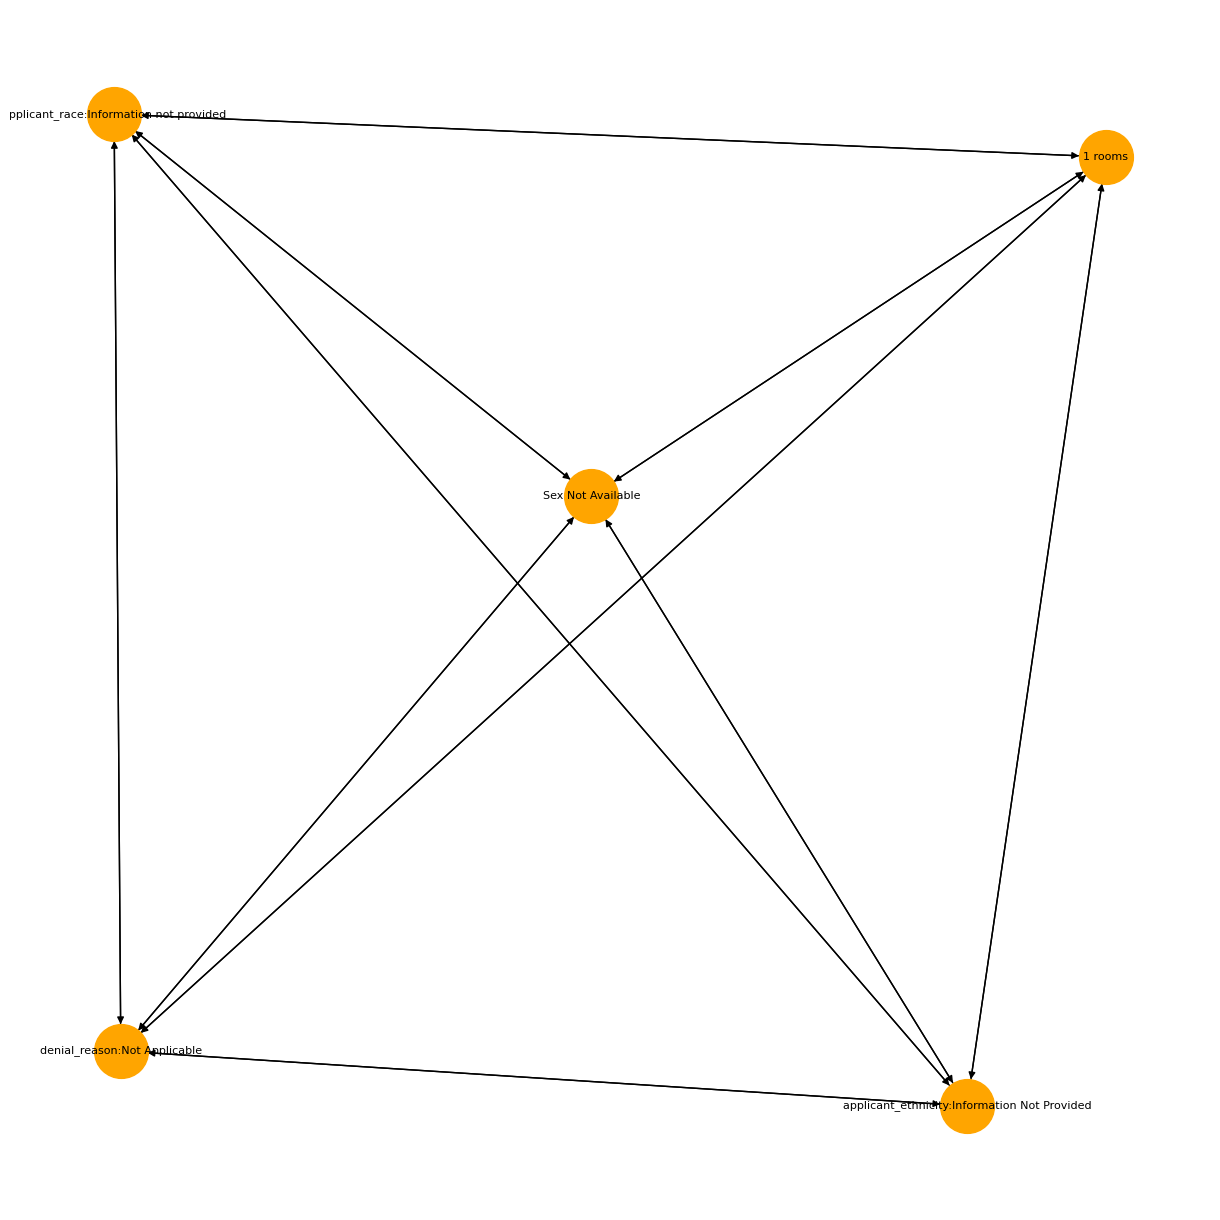

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph()

# for item in ars.head(15)['antecedents'].values.union(ars.head(15)['consequents'].values):
#     for i in item:
#         G.add_node(i)

for i, row in arsl.head(40).iterrows():
    for j in row['antecedents'].union(row['consequents']):
        G.add_node(j)

for _,rule in arsl.head(40).iterrows():
    ant, cons = rule['antecedents'],rule['consequents']
    for a in ant:
        for c in cons:
            G.add_edge(a,c,weight=rule['lift'])

fig = plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(
    G,
    pos, 
    with_labels= True,
    node_size=1500,
    node_color='orange',
    font_size=8
)
plt.show()

In [51]:
for met in ['support','confidence','lift']:
    ms = 0.5
    freq_items=apriori(ohe_df,min_support=ms,use_colnames=True,verbose=1)
    ars = association_rules(freq_items,metric=met,min_threshold=ms)
    # print(len(ars))
    while len(ars) <= 15:
        print(len(ars))
        print(ms)
        ms -= 0.05
        freq_items=apriori(ohe_df,min_support=ms,use_colnames=True,verbose=1)
        ars = association_rules(freq_items,metric=met,min_threshold=ms)
    
    print(ms)
    ars.sort_values(by=met,ascending=False,inplace=True)
    print("*"*80)
    print(met)
    # display(ars.head(15))
    for i, row in ars.head(15).iterrows():
        print('*'*80)
        print('support: {}\nconfidence:{}\nlift:{}'.format(row['support'],row['confidence'],row['lift']))
        print(row['antecedents'])
        print('*****')
        print(row['consequents'])
        print('*'*80)

Processing 4 combinations | Sampling itemset size 43
0.5
********************************************************************************
support
********************************************************************************
support: 0.8465628243024577
confidence:0.9897986175804206
lift:1.001601815229905
frozenset({'denial_reason:Not Applicable'})
*****
frozenset({'1 rooms'})
********************************************************************************
********************************************************************************
support: 0.8465628243024577
confidence:0.8566579569491103
lift:1.001601815229905
frozenset({'1 rooms'})
*****
frozenset({'denial_reason:Not Applicable'})
********************************************************************************
********************************************************************************
support: 0.7152040369661766
confidence:0.9893590964757111
lift:1.0011570529030138
frozenset({'applicant_ethnicity:Not Hispanic/Latino'})
****

In [2]:
import PyARMViz

In [84]:
G = nx.DiGraph()


In [85]:
ars

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19123,"(denial_reason:Not Applicable, applicant_ethni...",(Sex Not Available),0.114454,0.093975,0.075796,0.662241,7.047020,0.065041,2.682458,0.969003
19146,(Sex Not Available),"(denial_reason:Not Applicable, applicant_ethni...",0.093975,0.114454,0.075796,0.806563,7.047020,0.065041,4.577954,0.947099
19140,"(Sex Not Available, 1 rooms)","(denial_reason:Not Applicable, applicant_race:...",0.092961,0.115748,0.075796,0.815354,7.044214,0.065036,4.788896,0.945979
19129,"(denial_reason:Not Applicable, applicant_race:...","(Sex Not Available, 1 rooms)",0.115748,0.092961,0.075796,0.654840,7.044214,0.065036,2.627877,0.970356
12099,(Sex Not Available),"(denial_reason:Not Applicable, applicant_race:...",0.093975,0.115748,0.076519,0.814257,7.034735,0.065642,4.760609,0.946826
...,...,...,...,...,...,...,...,...,...,...
2086,"(denial_reason:Not Applicable, aus:Loan Prospe...",(aus:Desktop Underwriter),0.389330,0.569671,0.090546,0.232570,0.408253,-0.131243,0.560741,-0.703577
7801,(aus:Desktop Underwriter),"(denial_reason:Not Applicable, aus:Loan Prospe...",0.569671,0.384191,0.089204,0.156588,0.407580,-0.129658,0.730141,-0.771568
7788,"(denial_reason:Not Applicable, aus:Loan Prospe...",(aus:Desktop Underwriter),0.384191,0.569671,0.089204,0.232186,0.407580,-0.129658,0.560461,-0.702409
7792,"(denial_reason:Not Applicable, aus:Loan Prospe...","(aus:Desktop Underwriter, 1 rooms)",0.389330,0.564565,0.089204,0.229121,0.405836,-0.130599,0.564855,-0.705661


In [87]:
for i, row in ars.iterrows():
    for j in row['antecedents'].union(row['consequents']):
        G.add_node(j)

array([frozenset({'denial_reason:Not Applicable', 'applicant_ethnicity:Information Not Provided', 'applicant_race:Information not provided', '1 rooms'}),
       frozenset({'Sex Not Available'}),
       frozenset({'Sex Not Available', '1 rooms'}), ...,
       frozenset({'denial_reason:Not Applicable', 'aus:Loan Prospector/Product Advisor', '1 rooms'}),
       frozenset({'denial_reason:Not Applicable', 'aus:Loan Prospector/Product Advisor'}),
       frozenset({'aus:Desktop Underwriter', '1 rooms'})], dtype=object)

In [93]:
import matplotlib.pyplot as plt


# for item in ars['antecedents'].values.union(ars['consequents'].values):
#     for i in item:
#         G.add_node(i)

# for i, row in ars.head(15).iterrows():
#     for j in row['antecedents'].union(row['consequents']):
#         G.add_node(j)

# for _,rule in ars.head(15).iterrows():
#     ant, cons = rule['antecedents'],rule['consequents']
#     for a in ant:
#         for c in cons:
#             G.add_edge(a,c,weight=rule['lift'])

# fig = plt.figure(figsize=(18,18))

# pos = nx.spring_layout(G)
# nx.draw(
#     G,
#     pos, 
#     with_labels= True,
#     node_size=1500,
#     node_color='orange',
#     font_size=8
# )
# plt.show()

In [1]:
import PyARMViz